<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_05_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EC%82%B0%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.05. 기초통계 - 산포통계량
---
* 날짜: 2022-05-09
* 이름: 박태현

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [2]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a1`로 바인딩
a1 = np.random.normal(0, 1, 1000)
# 판다스 시리즈 `s1`로 바인딩
s1 = pd.Series(np.random.normal(0, 1, 1000))


* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [3]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a3`로 바인딩
a3 = np.random.normal(0, 3, 1000)
# 판다스 시리즈 `s3`로 바인딩
s3 = pd.Series(np.random.normal(0, 3, 1000))


* `a1`와 `a3`의 분포 그리기

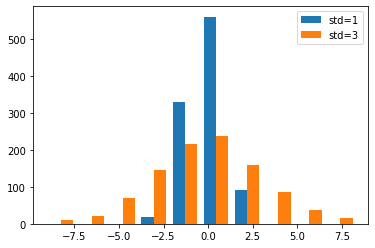

In [7]:
plt.hist([a1,a3])

plt.legend(['std=1','std=3'])
plt.show()

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [ ]:
ddof = 1

a1.var(), a3.var()

(0.9742344563121542, 8.768110106809388)

### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [9]:
a1.std(), a3.std()

(0.9870331586690257, 2.9610994760070772)

* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [10]:
a1.var(), (a1.std() ** 2)

(0.9742344563121542, 0.9742344563121541)

### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [11]:
a10 = a1 * 10

* `a1`과 `a10`의 분산 계산

In [12]:
a1.var(), a10.var()

(0.9742344563121542, 97.42344563121542)

#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



* min-max 함수 생성

In [13]:
def minmax(x):
  return x - x.min() / x.max() - x.min()

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [14]:
a1_minmax = minmax(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [15]:
a10_minmax = minmax(a10)

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([1.10393296, 1.68448278, 2.26503259, 2.84558241, 3.42613223,
        4.00668204, 4.58723186, 5.16778168, 5.74833149, 6.32888131,
        6.90943113]),
 <a list of 10 Patch objects>)

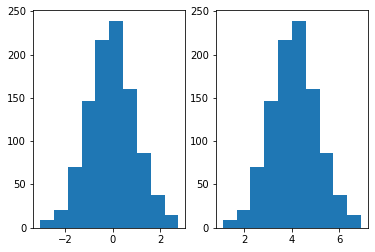

In [16]:
plt.subplot(121)
plt.hist(a1)
plt.subplot(122)
plt.hist(a1_minmax)

* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([ 1.10393296,  6.90943113, 12.7149293 , 18.52042747, 24.32592563,
        30.1314238 , 35.93692197, 41.74242014, 47.54791831, 53.35341648,
        59.15891465]),
 <a list of 10 Patch objects>)

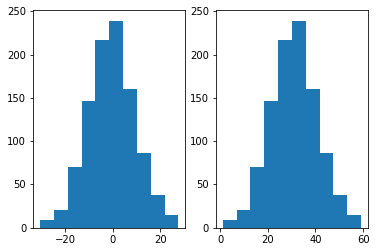

In [17]:
plt.subplot(121)
plt.hist(a10)
plt.subplot(122)
plt.hist(a10_minmax)

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [18]:
a1.max() - a1.min(), a10.max() - a10.min()

(5.805498168821509, 58.05498168821509)

* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [19]:
a1_minmax.var(), a10_minmax.var()

(0.9742344563121543, 97.42344563121542)

#### **스케일링: z-score**

**standard(z-socre) scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [20]:
def standard(x) : 
  return x - x.mean() / x.std()

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [21]:
a1_standard = standard(a1)

* `a10`을 standard 하여 `a10_standard` 로 바인딩

In [22]:
a10_standard = standard(a10)

* `a1`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.0002918 , -2.41974198, -1.83919217, -1.25864235, -0.67809253,
        -0.09754272,  0.4830071 ,  1.06355692,  1.64410673,  2.22465655,
         2.80520637]),
 <a list of 10 Patch objects>)

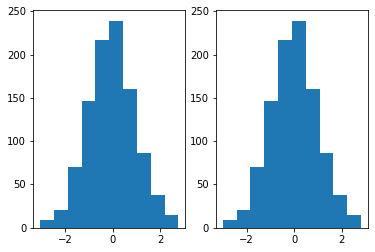

In [24]:
plt.subplot(121)
plt.hist(a1)
plt.subplot(122)
plt.hist(a1_standard)

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-30.41557929, -24.61008113, -18.80458296, -12.99908479,
         -7.19358662,  -1.38808845,   4.41740972,  10.22290789,
         16.02840606,  21.83390422,  27.63940239]),
 <a list of 10 Patch objects>)

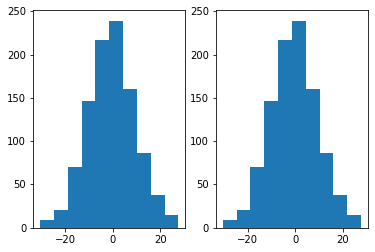

In [25]:
plt.subplot(121)
plt.hist(a10)
plt.subplot(122)
plt.hist(a10_standard)

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
a1.max() - a1.min(), a10.max() - a10.min()

(5.805498168821509, 58.05498168821509)

* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

In [ ]:
a1_standard.var(), a10_standard.var()

(0.9742344563121542, 97.42344563121542)

### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-30.46143055, -24.65593238, -18.85043421, -13.04493604,
         -7.23943787,  -1.4339397 ,   4.37155846,  10.17705663,
         15.9825548 ,  21.78805297,  27.59355114]),
 <a list of 10 Patch objects>)

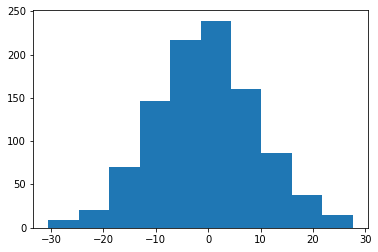

In [26]:
plt.hist(a10)

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

* `a10`의 범위 구하기

In [ ]:
# np.ptp 사용
np.ptp(a10)
# max-min 사용
np.ptp(a10), a10.max() - a10.min()

(58.05498168821509, 58.05498168821509)


#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quantile(x, percent)
```

* `a10`의 사분위 범위 구하기

In [ ]:
np.quantile(a10, 0.75) - np.quantile(a10, 0.25)

13.053706612482689